In [1]:
import pandas as pd
#import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from random import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [2]:
MalwareDataset = pd.read_csv("Malware_dataset.csv") 

In [3]:
print(MalwareDataset.shape)

(100000, 35)


In [4]:
MalwareDataset.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [5]:
from sklearn.utils import shuffle
MalwareDataset = shuffle(MalwareDataset)
MalwareDataset.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
69557,7ea81b362027866c147218ffa657a1ccc59d677f540bb0...,557,malware,0,0,3069997056,22191,0,0,0,...,28,2,114,1,3204448256,393717,5,1,0,0
46754,4872481a573f7c048db06b467bb68405febe870a45916d...,754,malware,0,0,3069652992,14252,0,0,0,...,46,1,112,1,3204448256,378951,4,6,0,0
99026,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,26,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
18633,com.microsoft.amp.apps.bingfinance.apk,633,benign,352256,0,3069575168,15681,0,0,0,...,0,0,120,1,3204448256,385558,3,0,0,0
79843,1c5643426b0d13ddcf0c12830e50252011bd2377e3b800...,843,malware,0,0,3070087168,14041,0,0,0,...,2,1,120,0,3204448256,377615,4,0,0,0


In [6]:
malware=print(MalwareDataset.columns)

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')


In [7]:
data=MalwareDataset.drop(["classification","hash"], axis=1)
#data=MalwareDataset

In [8]:
print(data.shape)

(100000, 33)


In [9]:
print(data.columns)

Index(['millisecond', 'state', 'usage_counter', 'prio', 'static_prio',
       'normal_prio', 'policy', 'vm_pgoff', 'vm_truncate_count', 'task_size',
       'cached_hole_size', 'free_area_cache', 'mm_users', 'map_count',
       'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm',
       'nr_ptes', 'end_data', 'last_interval', 'nvcsw', 'nivcsw', 'min_flt',
       'maj_flt', 'fs_excl_counter', 'lock', 'utime', 'stime', 'gtime',
       'cgtime', 'signal_nvcsw'],
      dtype='object')


In [10]:
target=MalwareDataset.drop(['hash', 'millisecond', 'state', 'usage_counter', 'prio', 'static_prio',
       'normal_prio', 'policy', 'vm_pgoff', 'vm_truncate_count', 'task_size',
       'cached_hole_size', 'free_area_cache', 'mm_users', 'map_count',
       'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm',
       'nr_ptes', 'end_data', 'last_interval', 'nvcsw', 'nivcsw', 'min_flt',
       'maj_flt', 'fs_excl_counter', 'lock', 'utime', 'stime', 'gtime',
       'cgtime', 'signal_nvcsw'], axis=1)

In [11]:
print(target.shape)
print(target.columns)

(100000, 1)
Index(['classification'], dtype='object')


In [12]:
target=target.classification.map({'benign':0, 'malware':1})

In [13]:
target[:10]

69557    1
46754    1
99026    1
18633    0
79843    1
35213    1
17000    0
75740    1
74873    1
47935    0
Name: classification, dtype: int64

In [14]:
import numpy as np
data=np.array(data)
target=np.array(target)

In [15]:
from sklearn import preprocessing
data = preprocessing.scale(data)
#target = preprocessing.scale(target)

C:\Users\Dilhara\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [16]:
data[:100]

array([[ 0.19918594, -0.16852568,  0.        , ..., -0.20270156,
         0.        ,  0.        ],
       [ 0.8816143 , -0.16852568,  0.        , ...,  1.32961952,
         0.        ,  0.        ],
       [-1.64025293, -0.1641504 ,  0.        , ..., -0.50916578,
         0.        ,  0.        ],
       ...,
       [-0.51788345, -0.16852568,  0.        , ..., -0.50916578,
         0.        ,  0.        ],
       [ 0.34121418, -0.1641504 ,  0.        , ..., -0.50916578,
         0.        ,  0.        ],
       [-1.10678102, -0.16852568,  0.        , ..., -0.50916578,
         0.        ,  0.        ]])

In [17]:
data= data.reshape(data.shape[0],data.shape[1],1)
print(data.shape)

(100000, 33, 1)


In [18]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [19]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()
model.add(LSTM(units=64,return_sequences=True,input_shape=(train_data.shape[1:])))
model.add(Dropout(0.2))
model.add(LSTM(units=128,return_sequences=True))

model.add(LSTM(units=64,return_sequences=True,input_shape=(train_data.shape[1:])))
model.add(Dropout(0.2))
model.add(LSTM(units=128,return_sequences=False))

model.add(Dense(1,activation='linear')) #Regression Linear activation

model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])


Using TensorFlow backend.


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 33, 64)            16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 33, 128)           98816     
_________________________________________________________________
lstm_3 (LSTM)                (None, 33, 64)            49408     
_________________________________________________________________
dropout_2 (Dropout)          (None, 33, 64)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [21]:
history=model.fit(train_data,train_target,epochs=7,validation_split=0.2)

Train on 72000 samples, validate on 18000 samples
Epoch 1/7
72000/72000 [==============================] - 355s 5ms/step - loss: 0.0782 - accuracy: 0.8921 - val_loss: 0.0309 - val_accuracy: 0.9691
Epoch 2/7
72000/72000 [==============================] - 347s 5ms/step - loss: 0.0118 - accuracy: 0.9863 - val_loss: 0.0026 - val_accuracy: 0.9978
Epoch 3/7
72000/72000 [==============================] - 364s 5ms/step - loss: 0.0073 - accuracy: 0.9918 - val_loss: 0.0014 - val_accuracy: 0.9983
Epoch 4/7
72000/72000 [==============================] - 351s 5ms/step - loss: 0.0037 - accuracy: 0.9959 - val_loss: 0.0012 - val_accuracy: 0.9987
Epoch 5/7
72000/72000 [==============================] - 344s 5ms/step - loss: 0.0036 - accuracy: 0.9957 - val_loss: 0.0026 - val_accuracy: 0.9968
Epoch 6/7
72000/72000 [==============================] - 374s 5ms/step - loss: 0.0036 - accuracy: 0.9959 - val_loss: 0.0091 - val_accuracy: 0.9880
Epoch 7/7
72000/72000 [==============================] - 361s 5ms/st

In [23]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')

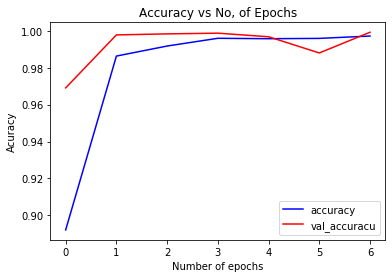

In [24]:
plt.plot(history.history['accuracy'],'b',label="accuracy")
plt.plot(history.history['val_accuracy'],'r',label="val_accuracu")
plt.xlabel('Number of epochs')
plt.ylabel('Acuracy')
plt.title('Accuracy vs No, of Epochs')
plt.legend()


In [25]:
#Testing the model
Result=model.predict(test_data)

In [26]:
from sklearn.metrics import r2_score
r2=r2_score(test_target,Result)
print('R2_score:',r2)

R2_score: 0.9989794599486426


In [28]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_target,Result.round())

print("Accuracy:",accuracy)

Accuracy: 0.9996


In [29]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(test_target, Result.round())

print('Average precision-recall score: {0:0.4f}'.format( average_precision))

Average precision-recall score: 0.9993


In [31]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(test_target, Result.round())
print("False positive rate : %f %%" % ((CM[0][1] / float(sum(CM[0])))*100))
print('False negative rate : %f %%' % ( (CM[1][0] /float(sum(CM[1]))*100)))

False positive rate : 0.059988 %
False negative rate : 0.020004 %
